In [44]:
import random
import warnings
import graphviz
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from pprint import pprint
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import train_test_split

from IPython.display import Image  
from six import StringIO
from sklearn.tree import export_graphviz
import pydotplus, graphviz
from sklearn import tree
import graphviz

warnings.filterwarnings("ignore")
%matplotlib inline
sns.set_style("darkgrid")

In [2]:
df = pd.read_csv("mushrooms.csv")

df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [4]:
df.shape

(8124, 23)

In [5]:
df.describe().T

,count,unique,top,freq
class,8124,2,e,4208
cap-shape,8124,6,x,3656
cap-surface,8124,4,y,3244
cap-color,8124,10,n,2284
bruises,8124,2,f,4748
odor,8124,9,n,3528
gill-attachment,8124,2,f,7914
gill-spacing,8124,2,c,6812
gill-size,8124,2,b,5612
gill-color,8124,12,b,1728


In [6]:
df.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

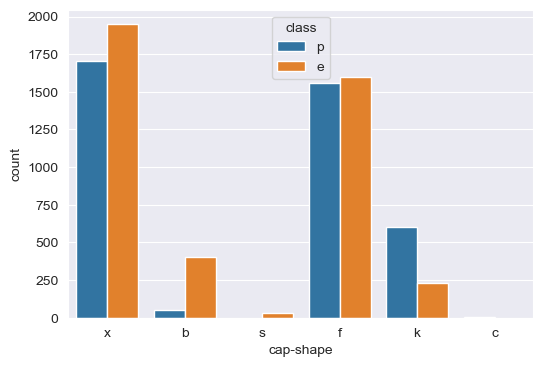

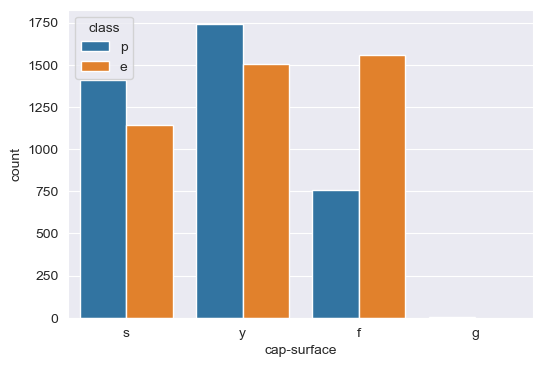

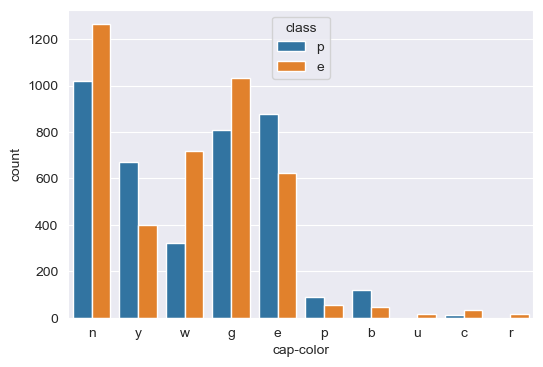

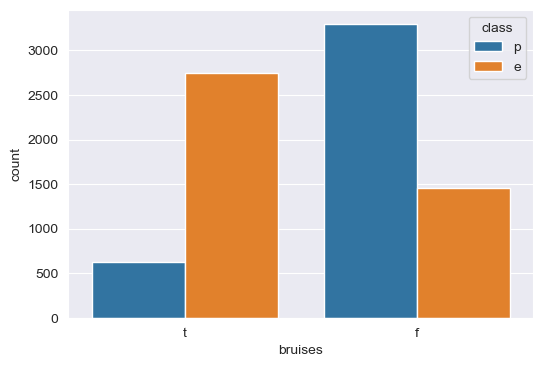

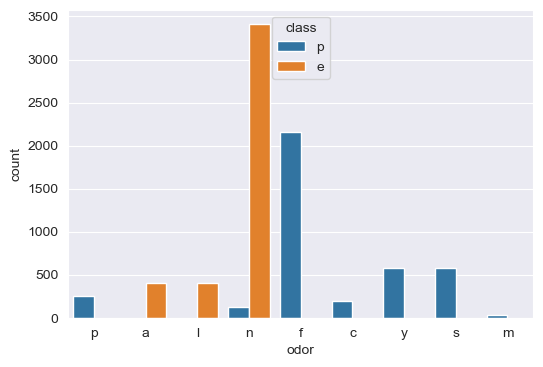

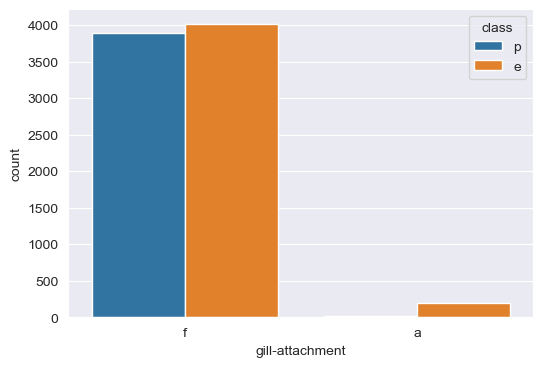

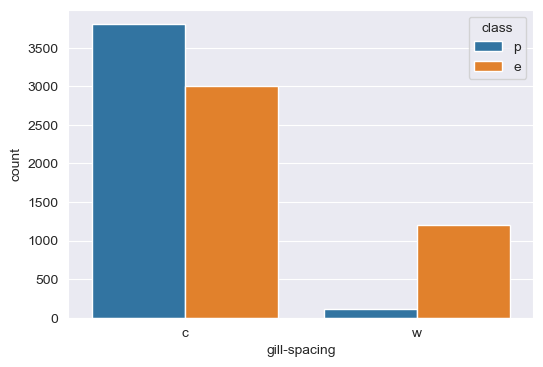

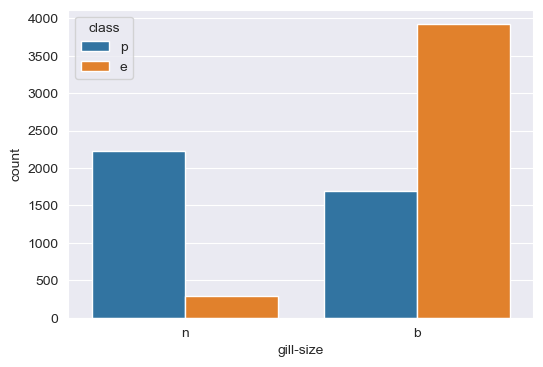

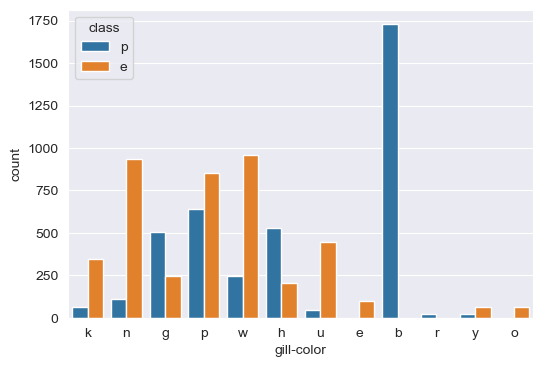

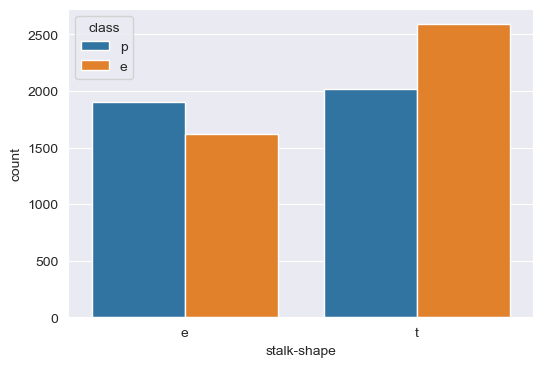

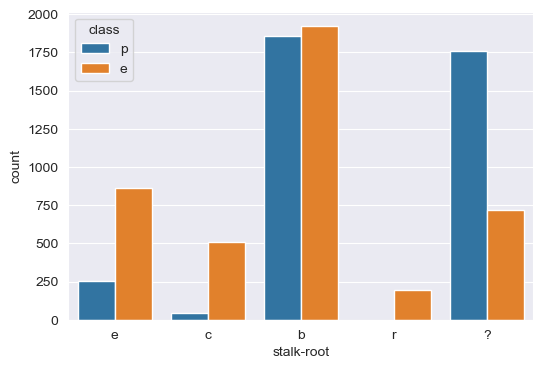

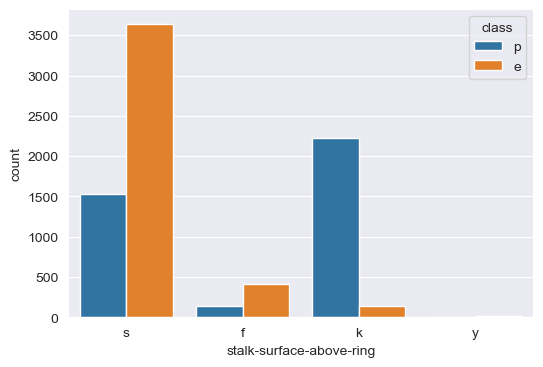

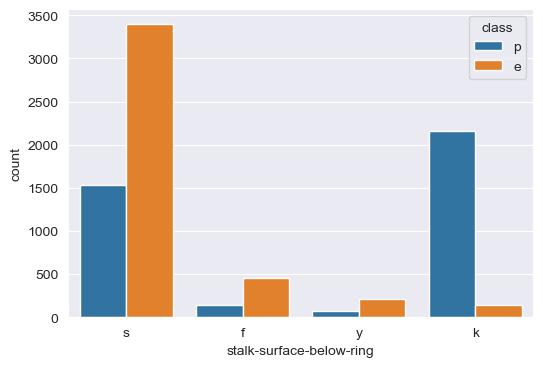

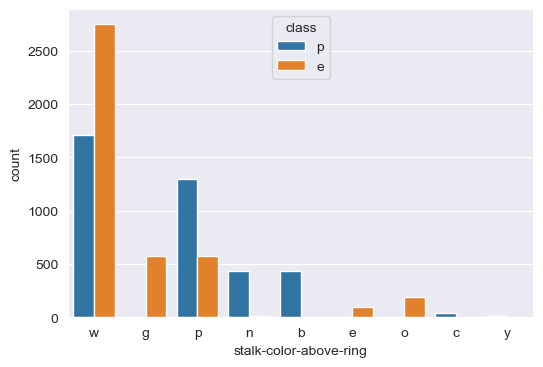

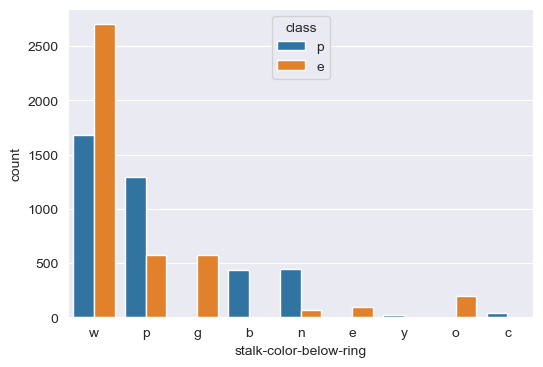

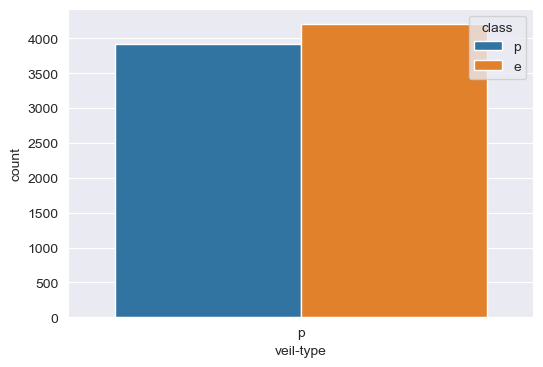

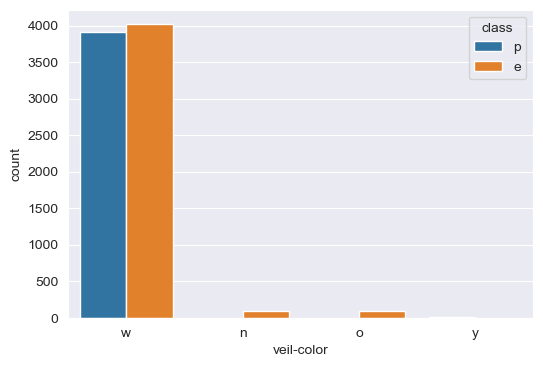

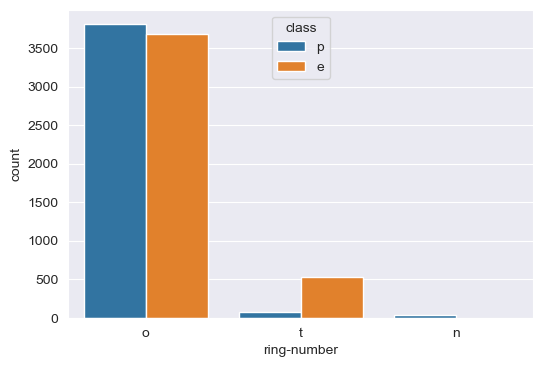

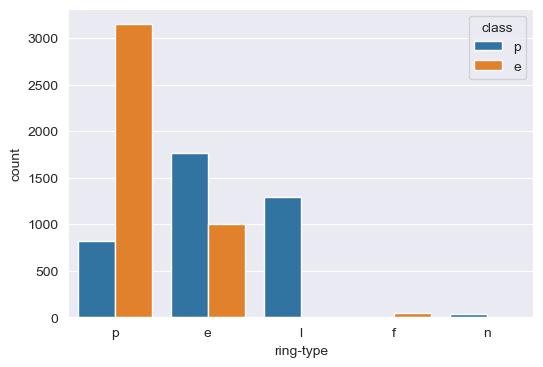

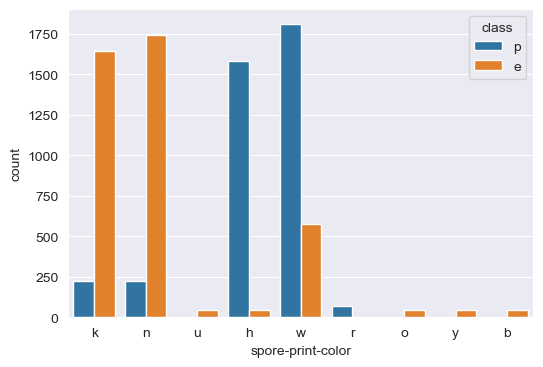

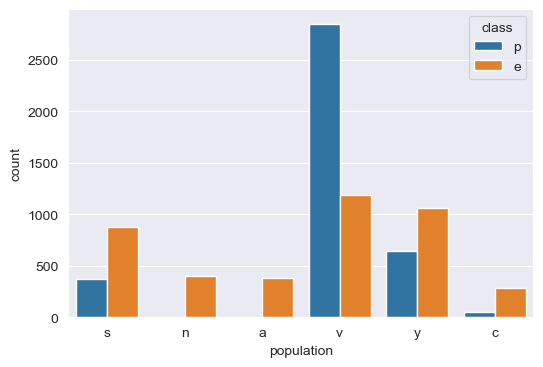

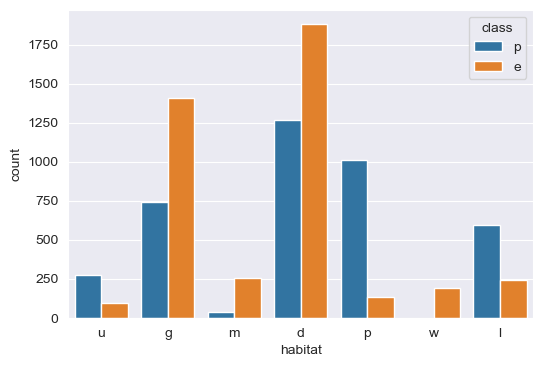

In [7]:
for i in df.columns:
    if i == 'class':
        continue
    plt.figure(figsize=(6, 4))
    sns.countplot(data = df, x = i, hue='class')
    plt.show()
plt.show()

In [8]:
new_df = df.copy()

le = LabelEncoder()
for col in new_df.columns:
    if col != 'class':
        new_df[col] = le.fit_transform(new_df[col])

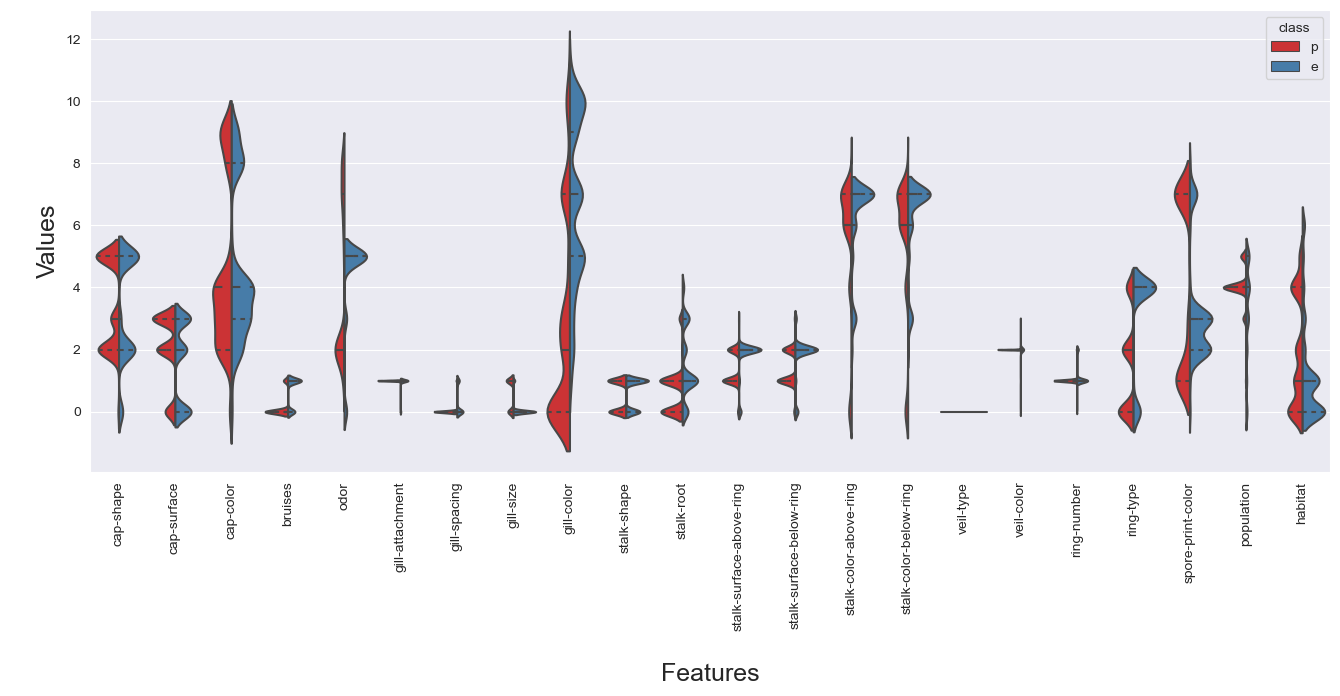

In [9]:
df_div = pd.melt(new_df, "class", var_name="Features")
fig, ax = plt.subplots(figsize=(16,6))

p = sns.violinplot(ax = ax, x="Features", y="value", hue="class", split = True,
                      data = df_div, inner = 'quartile', palette = 'Set1')

plt.xlabel('\nFeatures', fontsize=18)
plt.ylabel('\nValues'  , fontsize=18)

df_no_class = df.drop(["class"], axis = 1)

p.set_xticklabels(rotation = 90, labels = list(df_no_class.columns));

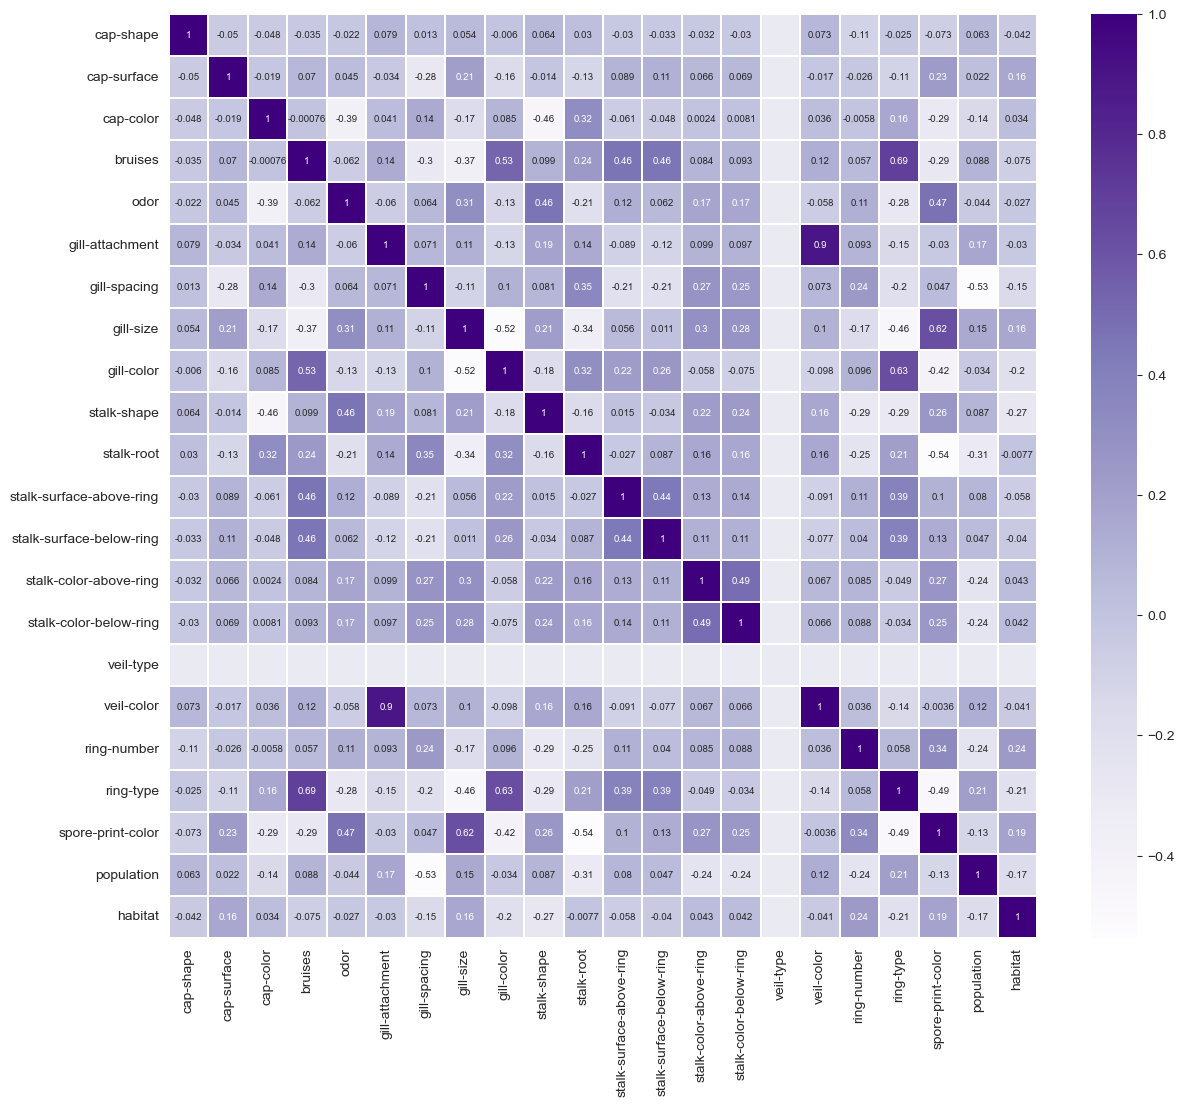

In [10]:
plt.figure(figsize = (14, 12))

sns.heatmap(new_df.corr(), linewidths = 0.1, cmap = "Purples", annot = True, annot_kws = {"size": 7})
plt.yticks(rotation=0);

In [11]:
y       = df.iloc[:, 0]
df      = df.drop(columns = ['class'], axis = 1)
df      = pd.get_dummies(df)
two_dfs = [df, y]
df      = pd.concat(two_dfs, axis = 1)

df.head()

,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,cap-surface_s,cap-surface_y,...,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w,class
0,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,1,0,p
1,0,0,0,0,0,1,0,0,1,0,...,0,0,0,1,0,0,0,0,0,e
2,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,e
3,0,0,0,0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,1,0,p
4,0,0,0,0,0,1,0,0,1,0,...,0,0,0,1,0,0,0,0,0,e


# Q1. Implementing Decision Tree from Scratch

### Train-Test-Split

In [12]:
def trainTestSplit(df, test_size):
    
    if isinstance(test_size, float):
        test_size = round(test_size * len(df))

    indices = df.index.tolist()
    test_indices = random.sample(population=indices, k=test_size)

    test_df = df.loc[test_indices]
    train_df = df.drop(test_indices)
    
    return train_df, test_df

### Data pure?

In [13]:
def check_purity(data):
    
    label_column = data[:, -1]
    unique_classes = np.unique(label_column)

    if len(unique_classes) == 1:
        return True
    else:
        return False

### Classify

In [14]:
def classify_data(data):
    
    label_column = data[:, -1]
    unique_classes, counts_unique_classes = np.unique(label_column, return_counts=True)

    index = counts_unique_classes.argmax()
    classification = unique_classes[index]
    
    return classification

### Potential splits?

In [15]:
def get_potential_splits(data):
    
    potential_splits = {}
    _, n_columns = data.shape
    for column_index in range(n_columns - 1):          # excluding the last column which is the label
        values = data[:, column_index]
        unique_values = np.unique(values)
        
        potential_splits[column_index] = unique_values
    
    return potential_splits

### Split Data

In [16]:
def split_data(data, split_column, split_value):
    
    split_column_values = data[:, split_column]

    type_of_feature = FEATURE_TYPES[split_column]
    if type_of_feature == "continuous":
        data_below = data[split_column_values <= split_value]
        data_above = data[split_column_values >  split_value]
    
    # feature is categorical   
    else:
        data_below = data[split_column_values == split_value]
        data_above = data[split_column_values != split_value]
    
    return data_below, data_above

### Lowest Overall Entropy?

In [17]:
def calculate_entropy(data):
    
    label_column = data[:, -1]
    _, counts = np.unique(label_column, return_counts=True)

    probabilities = counts / counts.sum()
    entropy = sum(probabilities * -np.log2(probabilities))
     
    return entropy

In [18]:
def calculate_overall_entropy(data_below, data_above):
    
    n = len(data_below) + len(data_above)
    p_data_below = len(data_below) / n
    p_data_above = len(data_above) / n

    overall_entropy =  (p_data_below * calculate_entropy(data_below) 
                      + p_data_above * calculate_entropy(data_above))
    
    return overall_entropy

In [19]:
def determine_best_split(data, potential_splits):
    
    overall_entropy = 9999
    for column_index in potential_splits:
        for value in potential_splits[column_index]:
            data_below, data_above = split_data(data, split_column=column_index, split_value=value)
            current_overall_entropy = calculate_overall_entropy(data_below, data_above)

            if current_overall_entropy <= overall_entropy:
                overall_entropy = current_overall_entropy
                best_split_column = column_index
                best_split_value = value
    
    return best_split_column, best_split_value

## Decision Tree Algorithm

### Determine Type of Feature

In [20]:
def determine_type_of_feature(df):
    
    feature_types = []
    n_unique_values_treshold = 15
    for feature in df.columns:
        if feature != "class":
            unique_values = df[feature].unique()
            example_value = unique_values[0]

            if (isinstance(example_value, str)) or (len(unique_values) <= n_unique_values_treshold):
                feature_types.append("categorical")
            else:
                feature_types.append("continuous")
    
    return feature_types

### Algorithm

In [21]:
def decision_tree_algorithm(df, counter=0, min_samples=2, max_depth=5):
    
    # data preparations
    if counter == 0:
        global COLUMN_HEADERS, FEATURE_TYPES
        COLUMN_HEADERS = df.columns
        FEATURE_TYPES = determine_type_of_feature(df)
        data = df.values
    else:
        data = df           
    
    
    # base cases
    if (check_purity(data)) or (len(data) < min_samples) or (counter == max_depth):
        classification = classify_data(data)
        
        return classification

    
    # recursive part
    else:    
        counter += 1

        # helper functions 
        potential_splits = get_potential_splits(data)
        split_column, split_value = determine_best_split(data, potential_splits)
        data_below, data_above = split_data(data, split_column, split_value)
        
        # check for empty data
        if len(data_below) == 0 or len(data_above) == 0:
            classification = classify_data(data)
            return classification
        
        # determine question
        feature_name = COLUMN_HEADERS[split_column]
        type_of_feature = FEATURE_TYPES[split_column]
        if type_of_feature == "continuous":
            question = "{} <= {}".format(feature_name, split_value)
            
        # feature is categorical
        else:
            question = "{} = {}".format(feature_name, split_value)
        
        # instantiate sub-tree
        sub_tree = {question: []}
        
        # find answers (recursion)
        yes_answer = decision_tree_algorithm(data_below, counter, min_samples, max_depth)
        no_answer = decision_tree_algorithm(data_above, counter, min_samples, max_depth)
        
        # If the answers are the same, then there is no point in asking the qestion.
        # This could happen when the data is classified even though it is not pure
        # yet (min_samples or max_depth base case).
        if yes_answer == no_answer:
            sub_tree = yes_answer
        else:
            sub_tree[question].append(yes_answer)
            sub_tree[question].append(no_answer)
        
        return sub_tree

In [22]:
df.head()

,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,cap-surface_s,cap-surface_y,...,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w,class
0,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,1,0,p
1,0,0,0,0,0,1,0,0,1,0,...,0,0,0,1,0,0,0,0,0,e
2,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,e
3,0,0,0,0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,1,0,p
4,0,0,0,0,0,1,0,0,1,0,...,0,0,0,1,0,0,0,0,0,e


In [23]:
features = df.columns

features

Index(['cap-shape_b', 'cap-shape_c', 'cap-shape_f', 'cap-shape_k',
       'cap-shape_s', 'cap-shape_x', 'cap-surface_f', 'cap-surface_g',
       'cap-surface_s', 'cap-surface_y',
       ...
       'population_v', 'population_y', 'habitat_d', 'habitat_g', 'habitat_l',
       'habitat_m', 'habitat_p', 'habitat_u', 'habitat_w', 'class'],
      dtype='object', length=118)

In [24]:
random.seed(0)
train_df, test_df = trainTestSplit(df, test_size = 0.2)

data = train_df.values
data[:2]

array([[0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
        0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
        0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
        0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
        1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
        0, 0, 0, 0, 0, 1, 0, 'p'],
       [0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
        0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0,
        0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
        0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
        1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
        0, 1, 0, 0, 0, 0, 0, 'e']], dtype=object)

In [25]:
tree = decision_tree_algorithm(train_df, max_depth=5)
pprint(tree)

{'odor_n = 1': [{'spore-print-color_r = 1': ['p',
                                             {'stalk-surface-below-ring_y = 1': [{'population_y = 1': ['e',
                                                                                                       'p']},
                                                                                 {'gill-size_n = 1': [{'population_c = 1': ['p',
                                                                                                                            'e']},
                                                                                                      'e']}]}]},
                {'bruises_t = 1': [{'stalk-root_c = 1': ['e',
                                                         {'stalk-surface-below-ring_y = 1': ['e',
                                                                                             {'habitat_d = 1': ['e',
                                                                                  

### Classification

In [26]:
example = test_df.iloc[0]
example

cap-shape_b    0
cap-shape_c    0
cap-shape_f    1
cap-shape_k    0
cap-shape_s    0
              ..
habitat_m      0
habitat_p      0
habitat_u      0
habitat_w      0
class          p
Name: 6917, Length: 118, dtype: object

In [27]:
def classify_example(example, tree):
    question = list(tree.keys())[0]
    feature_name, comparison_operator, value = question.split(" ")

    # ask question
    if comparison_operator == "<=":  # feature is continuous
        if example[feature_name] <= float(value):
            answer = tree[question][0]
        else:
            answer = tree[question][1]
    
    # feature is categorical
    else:
        if str(example[feature_name]) == value:
            answer = tree[question][0]
        else:
            answer = tree[question][1]

    # base case
    if not isinstance(answer, dict):
        return answer
    
    # recursive part
    else:
        residual_tree = answer
        return classify_example(example, residual_tree)

In [28]:
classify_example(example, tree)

'p'

### Calculate Accuracy

In [29]:
def calculate_accuracy(df, tree):

    df["classification"] = df.apply(classify_example, axis=1, args=(tree,))
    df["classification_correct"] = df["classification"] == df["class"]
    
    accuracy = df["classification_correct"].mean()
    
    return accuracy

In [30]:
df = pd.read_csv('mushrooms.csv')

y = df.iloc[:, 0]
df = df.drop(columns=['class'], axis=1)
df = pd.get_dummies(df)

two_dfs = [df, y]

df = pd.concat(two_dfs, axis=1)
for i in df.columns:
    df[i] = le.fit_transform(df[i])

In [31]:
random.seed(0)

train_df, test_df = trainTestSplit(df, 0.2)
tree = decision_tree_algorithm(train_df, max_depth = 2)
scratch_accuracy = calculate_accuracy(test_df, tree)

pprint(tree, width = 10)

print('\n\nAccuracy of the Decison Tree build from the Scratch: ', scratch_accuracy)

{'odor_n = 1': [{'spore-print-color_r = 1': [1,
                                             0]},
                {'bruises_t = 1': [0,
                                   1]}]}


Accuracy of the Decison Tree build from the Scratch:  0.9267692307692308


In [32]:
# dalta k da finish kigi

# Q.2 Implementing Decision Tree using Sklearn

In [33]:
data = pd.read_csv('mushrooms.csv')

data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [34]:
for i in data.columns:
    data[i] = le.fit_transform(data[i])
    
data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1


In [35]:
y = data.iloc[:, 0]
x = data.iloc[:, 1:]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=0)

In [36]:
dt = DecisionTreeClassifier()

dt.fit(x_train, y_train)
predictions = dt.predict(x_test)
sklearn_accuracy = accuracy_score(y_test, predictions)

print('\n\nAccuracy of the Decison Tree from the SKlearn: ', sklearn_accuracy)



Accuracy of the Decison Tree from the SKlearn:  1.0


Confusion Matrix is : 
 [[1061    0]
 [   0  970]]


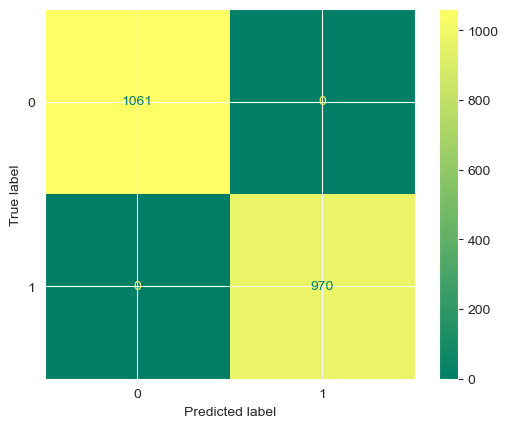

In [37]:
confusion_matrix = confusion_matrix(y_test, predictions)
print('Confusion Matrix is : \n', confusion_matrix)
disp = plot_confusion_matrix(dt, x_test, y_test, display_labels = [0,1],
#                                 show_absolute=True,
#                                 class_names =class_names,
                                colorbar=True, cmap='summer')

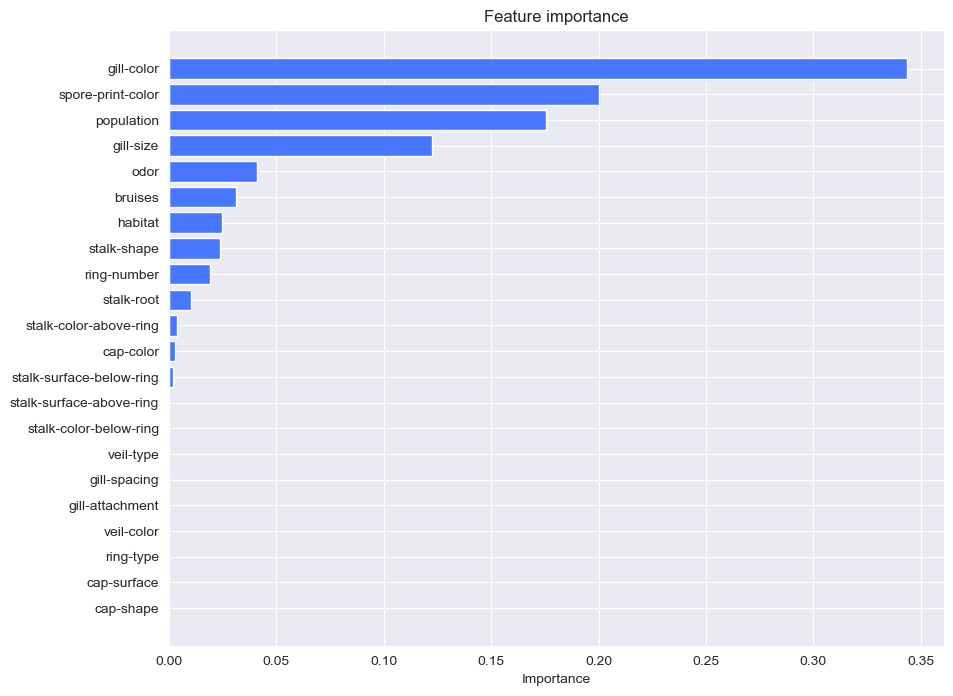

In [38]:
features_list = x.columns.values
feature_importance = dt.feature_importances_
sorted_idx = np.argsort(feature_importance)

plt.figure(figsize=(10, 8))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center', color ="#4876FF")
plt.yticks(range(len(sorted_idx)), features_list[sorted_idx])
plt.xlabel('Importance')
plt.title('Feature importance')
plt.draw()

#  1E90FF

In [39]:
# !pip install graphviz

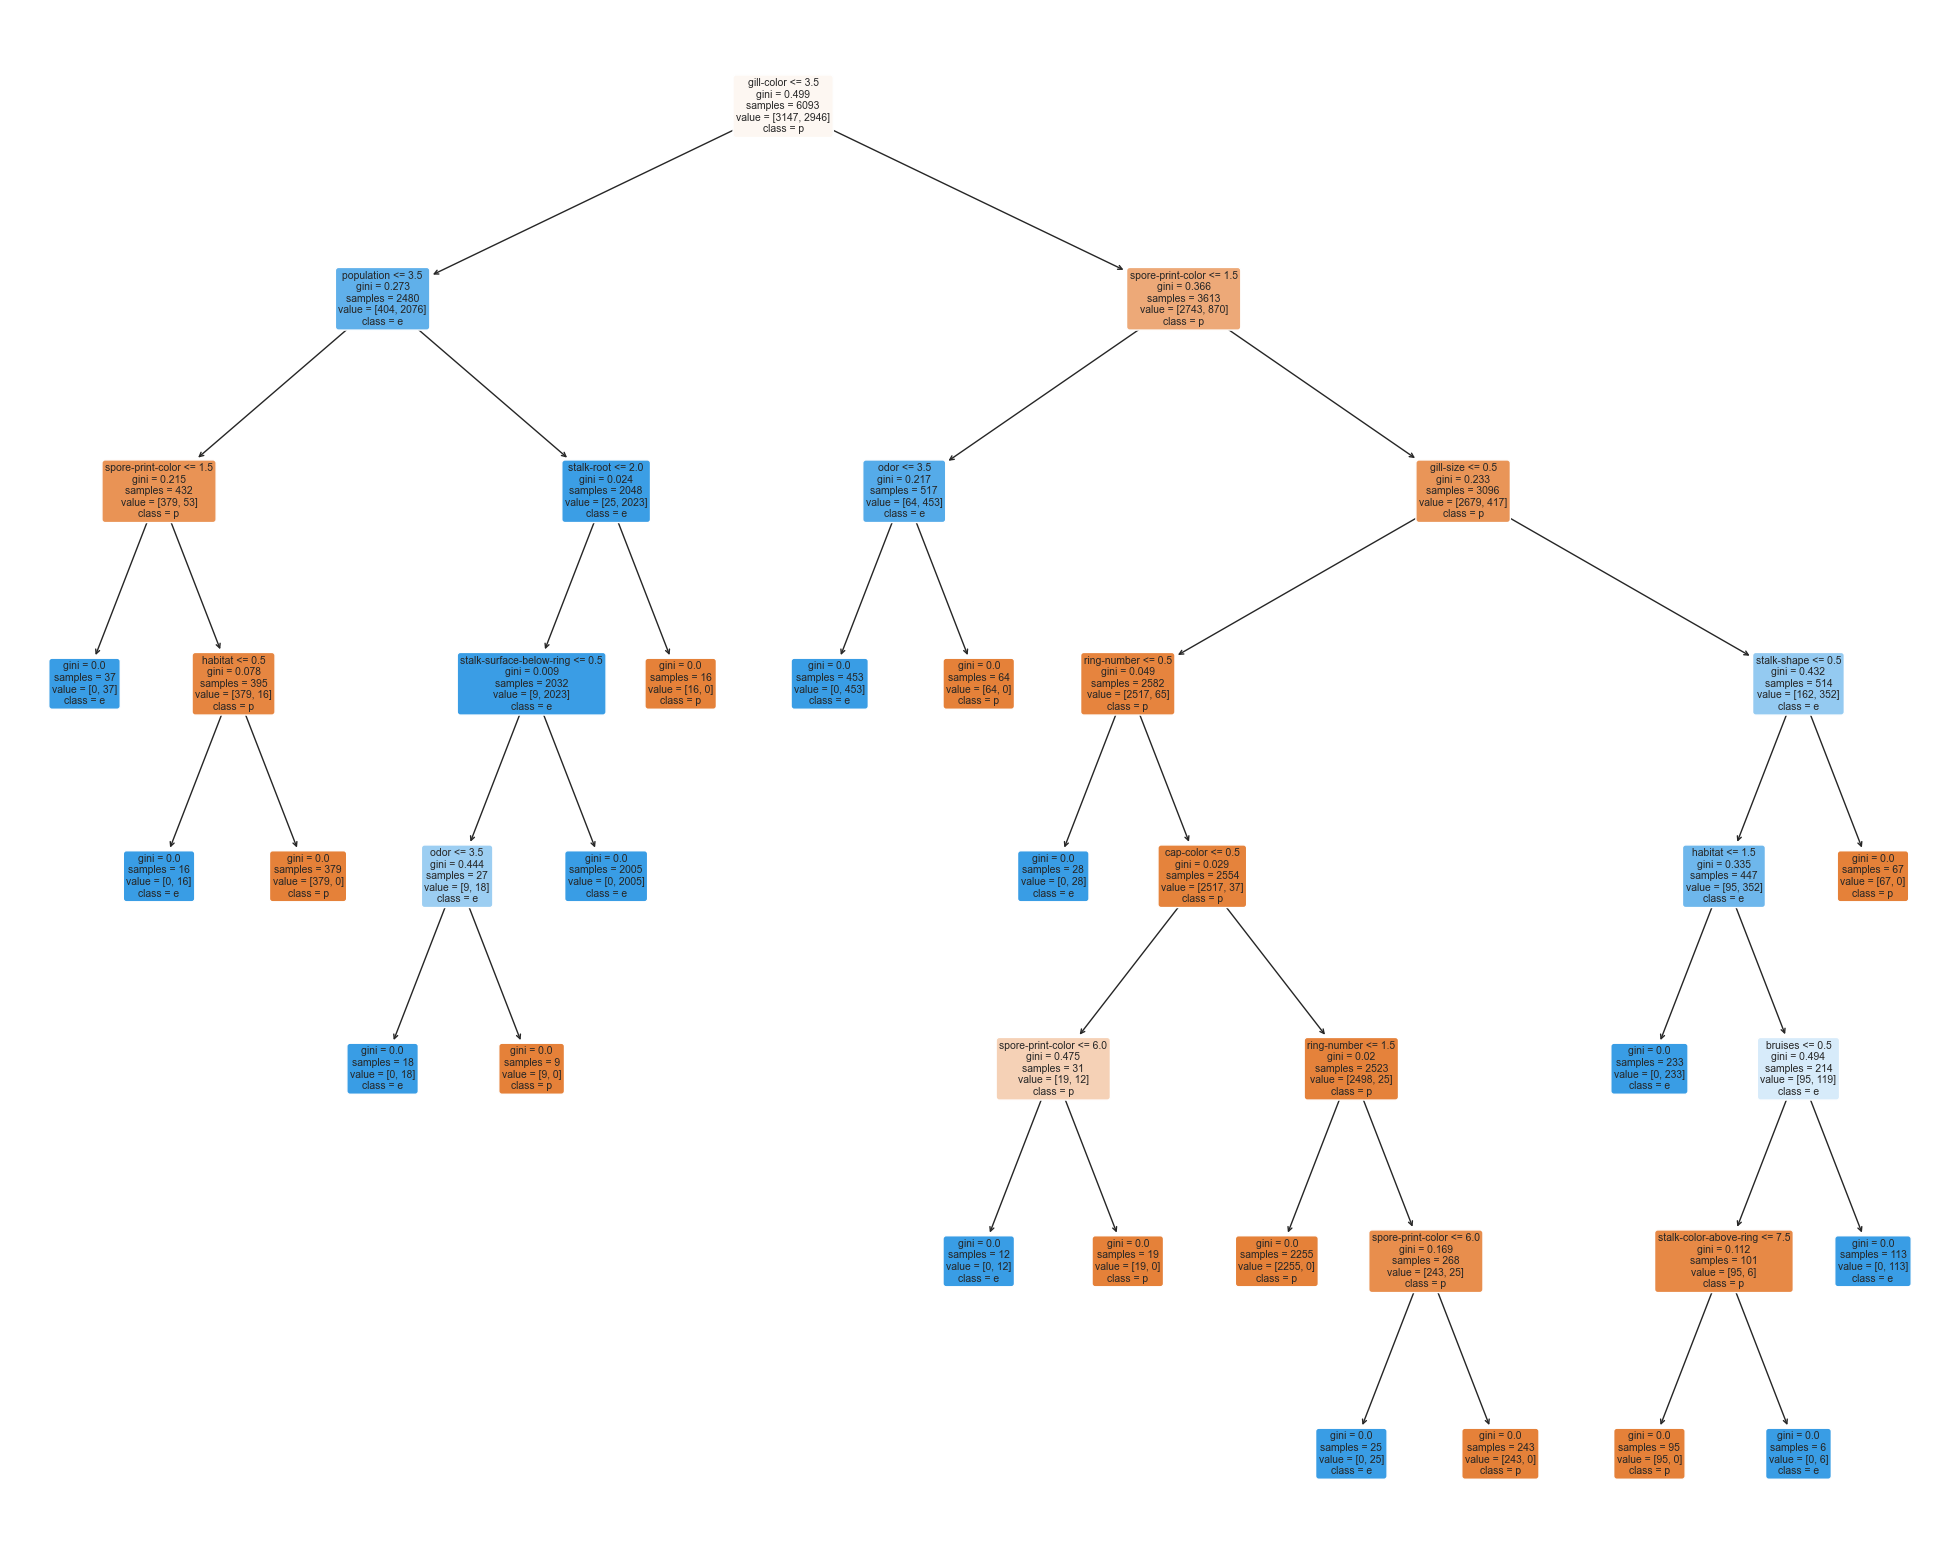

In [41]:
fig = plt.figure(figsize=(25,20))

_ = tree.plot_tree(dt,
                   feature_names = x_train.columns,
                   class_names   = np.array(['p', 'e']),
                   filled=True,
                  rounded=True)

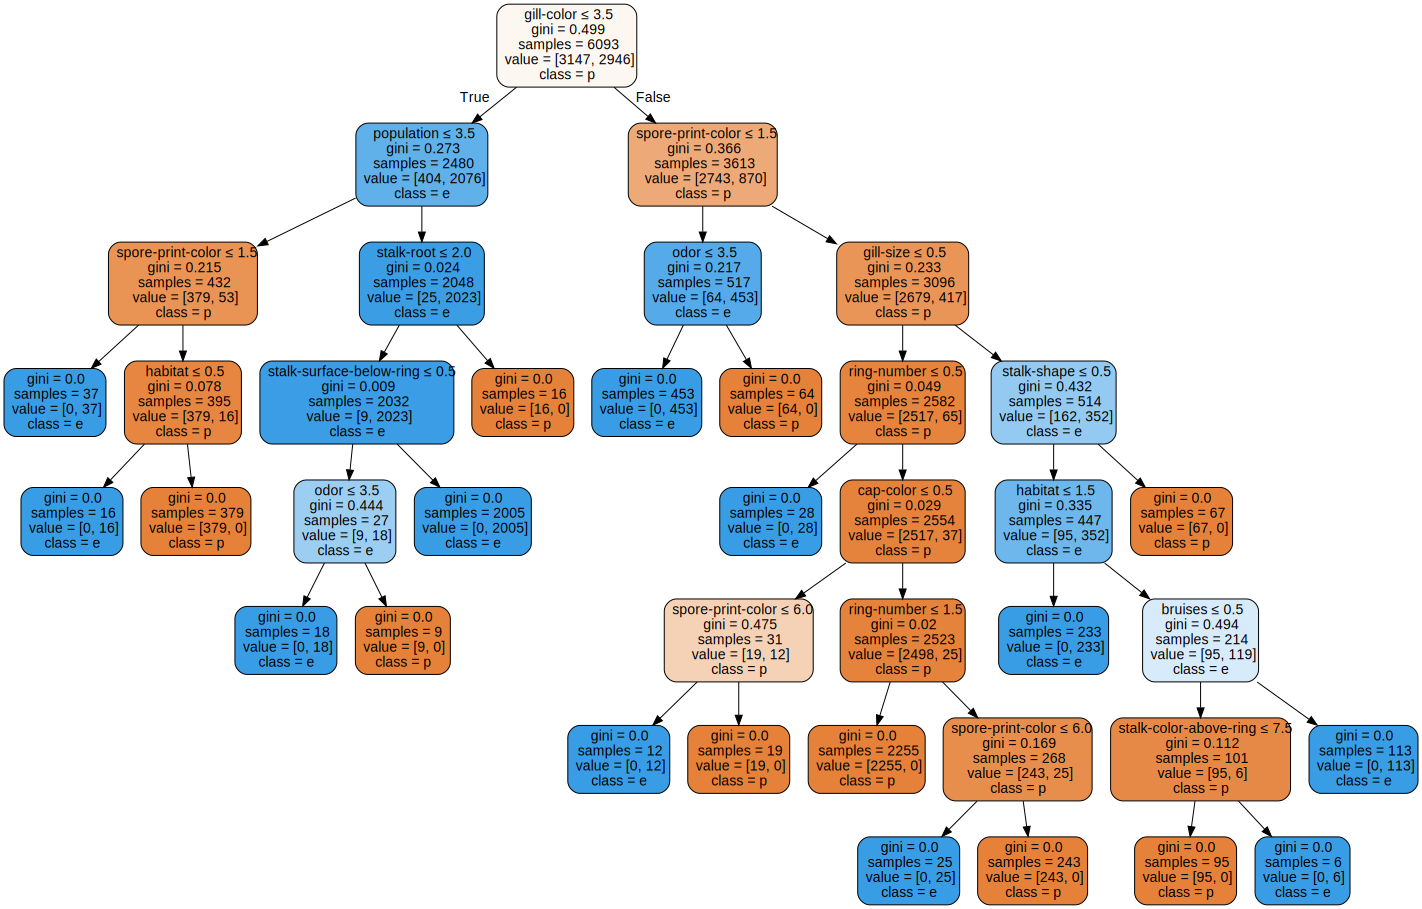

In [42]:

dot_data = tree.export_graphviz(dt,
                                out_file          = None,
                                feature_names      = x_train.columns,  
                                class_names        = np.array(['p', 'e']),  
                                filled             = True,
                                rounded            = True,
                                special_characters = True)

graph = graphviz.Source(dot_data) 

graph 

In [ ]:
# !pip install pydotplus
# conda install python-graphviz

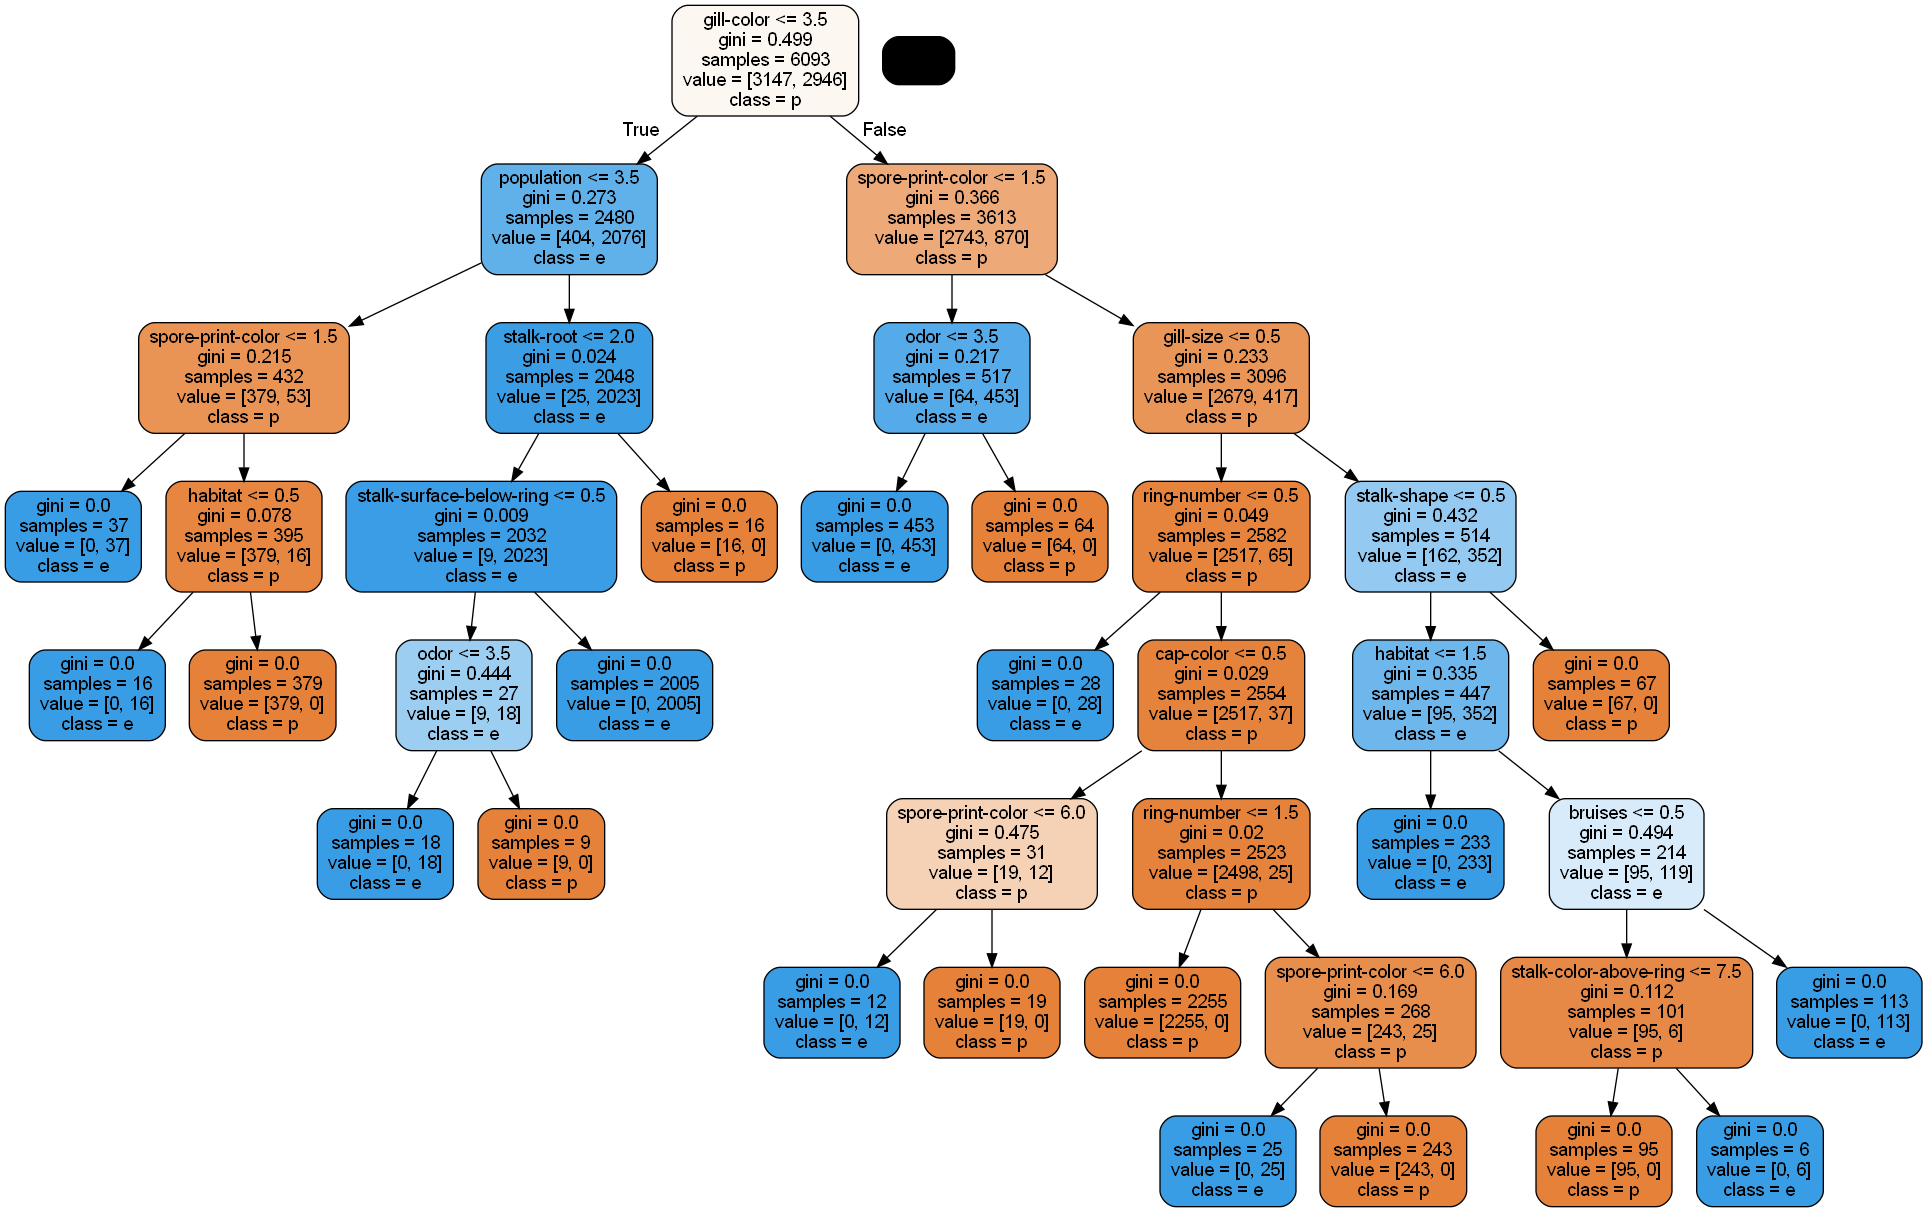

In [43]:
dot_data = StringIO()  

export_graphviz(dt, out_file  = dot_data,
                filled        = True,
                rounded       = True,
                feature_names = x_train.columns,
                class_names   =['p', "e"])

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

# Comparison between the results from Scratch and Sklearn 

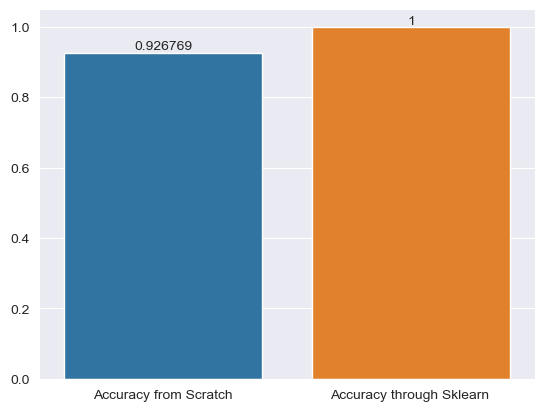

In [45]:
dict_comparison = {'Accuracy from Scratch': scratch_accuracy,
                   'Accuracy through Sklearn ': sklearn_accuracy}

comparison_df = pd.DataFrame(dict_comparison, index=[0])

ax = sns.barplot(data = comparison_df)
ax.bar_label(ax.containers[0])
plt.show()

The **`Decision Tree`** from **`sklearn`** performed better than ours. The reason can be that **`sklearn`** have all the parameters build for **`Decision Tree`** while we only looked into a few ones.

***
***
***
***


# Q3. Neural Networks

## 1.	Forward Propagation : 
Calculate the value of **`L`**. Use the weights and the input values to calculate the value of `L` using **`forward propagation`**.

### Solution :-

The mathematical activities of neural networks are the subject of this inquiry. We must carry out **`forward propagation`** to determine the network's output in order to answer the first part of the question. The weights and input values for the network are provided to us, and we are instructed to utilise them to get the value of **`L`**. In order to propagate the input across the network, we must use the proper activation functions and multiply the input values by the weight matrices.

### Solution: 

B1 = A1 * weights_A1_B1 + A2 * weights_A2_B1 + bias_B1
B2 = A1 * weights_A1_B2 + A2 * weights_A2_B2 + bias_B2
C1 = B1 * weights_B1_C1 + B2 * weights_B2_C1 + bias_C1
C2 = B1 * weights_B1_C2 + B2 * weights_B2_C2 + bias_C2
D = C1 * weights_C1_D + C2 * weights_C2_D + bias_D
L = (D - t)^2

B1 = (-1*-2) + (1*1) = 3
B2 = (-1*1) + (1*2) = 1

C1 = (3*1) + (1*-2) = 1
C2 = (3*-1) + (1 * 0) = -3

D = (1*1) + (-3 * -1) =4

L = (4 -3)^2=1




## 2.	Backward Propagation:
Compute the derivatives. Use **`backward propagation`** to find the derivatives of the following variables with respect to each input and weight: ($A_1$, $A_2$, $B_1$, $B_2$, $C_1$, $C_2$, $D$). Use the chain rule to find the derivatives of each variable with respect to the inputs and weights.

### Solution:-


#### EXPLANATION

In order to calculate the derivatives of the variables with respect to each input and weight, **`backward propagation`** is required in the second section of the question. In order to do this, we must use the chain rule to determine the derivatives of each variable with regard to the network's inputs and weights. Also, we are needed to apply a target output value to determine the derivative of the loss function with respect to the network's output. Lastly, we can apply gradient descent to update the network's weights and biases using the obtained derivatives.

Here must, first compute the derivatives of the loss with respect to the network's output before using the chain rule to compute the derivatives with respect to the inputs and weights. This is necessary to compute the derivatives using **`backward propagation`**.

 

#### Derivative of loss with respect to output:

The derivative of L with respect to D (dL/dD) = 2 * (D - t)

Then, 

The derivatives of L with respect to C1 (dL/dC1) and C2 (dL/dC2) 

calculation

dL/dC1 = dL/dD * weights_C1_D 
dL/dC2 = dL/dD * weights_C2_D. 

The derivatives of L with respect to B1 (dL/dB1) and B2 (dL/dB2) 

calculation

dL/dB1 = dL/dC1 * weights_B1_C1 + dL/dC2 * weights_B1_C2 
dL/dB2 = dL/dC1 * weights_B2_C1 + dL/dC2 * weights_B2_C2. 
Hence: 
the derivatives of L with respect to A1 (dL/dA1) and A2 (dL/dA2) 
dL/dA1 = dL/dB1 * weights_A1_B1 and dL/dA2 = dL/dB2 * weights_A2_B2.

L=1
A1 = -12
A2 = 0
B1 = 6
B2 = 0
C1 = 2
C2 = -2
D = 2


# References

1.Decision-Tree-from-Scratch/notebooks/Video 09 - Code Update.ipynb
   https://github.com/SebastianMantey/Decision-Tree-from-Scratch/blob/master/notebooks/Video%2009%20-%20Code%20Update.ipynb
   
2. Coding a Decision Tree from Scratch (Python) p.8 - Handling Categorical Features
    https://www.sebastian-mantey.com/code-blog/coding-a-decision-tree-from-scratch-python-p8-handling-categorical-features
    
3. How To Perform Exploratory Data Analysis -A Guide for Beginners
 https://www.analyticsvidhya.com/blog/2021/08/how-to-perform-exploratory-data-analysis-a-guide-for-beginners/
 
 4. Decision-Tree Classifier Tutorial
    https://www.kaggle.com/code/prashant111/decision-tree-classifier-tutorial/notebook
    
 5. AssemblyAI-Examples Machine-Learning-From-Scratch
 
 https://github.com/AssemblyAI-Examples/Machine-Learning-From-Scratch/blob/main/04%20Decision%20Trees/DecisionTree.py